# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, statsmodels, sklearn, and Prophet.

In [3]:
# Import the necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import statsmodels.api as sm  # For statistical models
from sklearn.metrics import mean_squared_error  # For calculating mean squared error
from prophet import Prophet  # For time series forecasting

# Load and Clean Data
Load the CSV files, rename columns, drop rows with all NaN values, clean numeric columns, and convert the 'Period' column to datetime.

In [4]:
# List of file paths to be processed
files = [
    '/content/Kasko 2019 2023.csv',
    '/content/Kasko_2013-2018.csv'
]

# Function to clean and prepare each file
def clean_file(file_path):
    # Load the file
    df = pd.read_csv(file_path)

    # Rename columns for clarity
    df.columns = [
        "Period",
        "Gross_Written_Premium_TL",
        "Gross_Increase_Rate",
        "Net_Written_Premium_TL",
        "Net_Increase_Rate",
        "Net_Earned_Premium_TL",
        "Earned_Increase_Rate",
        "Net_Realized_Loss_TL",
        "Loss_Increase_Rate",
        "Technical_Profit_TL",
        "Technical_Profit_Increase_Rate",
        "Net_Loss_Premium_Rate",
        "Combined_Ratio"
    ]

    # Drop rows with all NaN values
    df = df.dropna(how='all').reset_index(drop=True)

    # Clean numeric columns
    numeric_columns = [
        "Gross_Written_Premium_TL",
        "Gross_Increase_Rate",
        "Net_Written_Premium_TL",
        "Net_Increase_Rate",
        "Net_Earned_Premium_TL",
        "Earned_Increase_Rate",
        "Net_Realized_Loss_TL",
        "Loss_Increase_Rate",
        "Technical_Profit_TL",
        "Technical_Profit_Increase_Rate",
        "Net_Loss_Premium_Rate",
        "Combined_Ratio"
    ]

    for col in numeric_columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(r"[^\d.,()-]", "", regex=True)  # Remove non-numeric characters
            .str.replace(",", "", regex=False)  # Remove commas
            .str.replace(r"\((.*?)\)", r"-\1", regex=True)  # Convert parentheses to negative sign
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

    # Convert "Period" to datetime
    df["Period"] = pd.to_datetime(df["Period"], format='%Y', errors='coerce')

    return df

# Process and combine all files
dataframes = [clean_file(file) for file in files]
combined_data = pd.concat(dataframes, ignore_index=True)

# Set "Period" as the index and sort
combined_data = combined_data.set_index("Period").sort_index()

# Fill missing values (forward fill)
combined_data = combined_data.ffill()

# Ensure no NaN or infinite values
combined_data = combined_data.replace([np.inf, -np.inf], np.nan).dropna()

# Remove rows where the index is NaT
combined_data = combined_data[combined_data.index.notna()]

combined_data.head()  # Display the first few rows of the cleaned data

,Gross_Written_Premium_TL,Gross_Increase_Rate,Net_Written_Premium_TL,Net_Increase_Rate,Net_Earned_Premium_TL,Earned_Increase_Rate,Net_Realized_Loss_TL,Loss_Increase_Rate,Technical_Profit_TL,Technical_Profit_Increase_Rate,Net_Loss_Premium_Rate,Combined_Ratio
Period,,,,,,,,,,,,
2013-01-01,5.026029e+09,10.9,4.832362e+09,11.1,4.627584e+09,18.3,2.924104e+09,-3.8,702040720.0,-1248.58,63.2,91.3
2013-01-01,5.026029e+09,10.9,1.580638e+10,25.6,2.083241e+10,21.7,2.924104e+09,-3.8,702040720.0,-1248.58,63.2,91.3
2014-01-01,5.085933e+09,1.2,1.762590e+10,11.5,2.271183e+10,9.0,2.924104e+09,-3.8,702040720.0,-1248.58,63.2,91.3
2014-01-01,5.085933e+09,1.2,4.900440e+09,1.4,4.790630e+09,3.5,3.095699e+09,5.9,751010005.0,6.98,64.6,93.5
2015-01-01,5.539860e+09,8.9,2.152833e+10,22.1,2.706819e+10,19.2,3.095699e+09,5.9,751010005.0,6.98,64.6,93.5


# Combine Data from Multiple Files
Combine the cleaned data from multiple files into a single DataFrame, set 'Period' as the index, sort the index, and fill missing values.

In [5]:
# Combine Data from Multiple Files

# Process and combine all files
dataframes = [clean_file(file) for file in files]

# Concatenate all dataframes into a single dataframe
combined_data = pd.concat(dataframes, ignore_index=True)

# Set "Period" as the index and sort the index
combined_data = combined_data.set_index("Period").sort_index()

# Fill missing values using forward fill method
combined_data = combined_data.ffill()

# Replace infinite values with NaN and drop rows with NaN values
combined_data = combined_data.replace([np.inf, -np.inf], np.nan).dropna()

# Remove rows where the index is NaT (Not a Time)
combined_data = combined_data[combined_data.index.notna()]

# Display the first few rows of the combined data
combined_data.head()

,Gross_Written_Premium_TL,Gross_Increase_Rate,Net_Written_Premium_TL,Net_Increase_Rate,Net_Earned_Premium_TL,Earned_Increase_Rate,Net_Realized_Loss_TL,Loss_Increase_Rate,Technical_Profit_TL,Technical_Profit_Increase_Rate,Net_Loss_Premium_Rate,Combined_Ratio
Period,,,,,,,,,,,,
2013-01-01,5.026029e+09,10.9,4.832362e+09,11.1,4.627584e+09,18.3,2.924104e+09,-3.8,702040720.0,-1248.58,63.2,91.3
2013-01-01,5.026029e+09,10.9,1.580638e+10,25.6,2.083241e+10,21.7,2.924104e+09,-3.8,702040720.0,-1248.58,63.2,91.3
2014-01-01,5.085933e+09,1.2,1.762590e+10,11.5,2.271183e+10,9.0,2.924104e+09,-3.8,702040720.0,-1248.58,63.2,91.3
2014-01-01,5.085933e+09,1.2,4.900440e+09,1.4,4.790630e+09,3.5,3.095699e+09,5.9,751010005.0,6.98,64.6,93.5
2015-01-01,5.539860e+09,8.9,2.152833e+10,22.1,2.706819e+10,19.2,3.095699e+09,5.9,751010005.0,6.98,64.6,93.5


# Plot Initial Data
Plot the initial data to visualize the Gross Written Premium, Net Written Premium, and Technical Profit over the years.

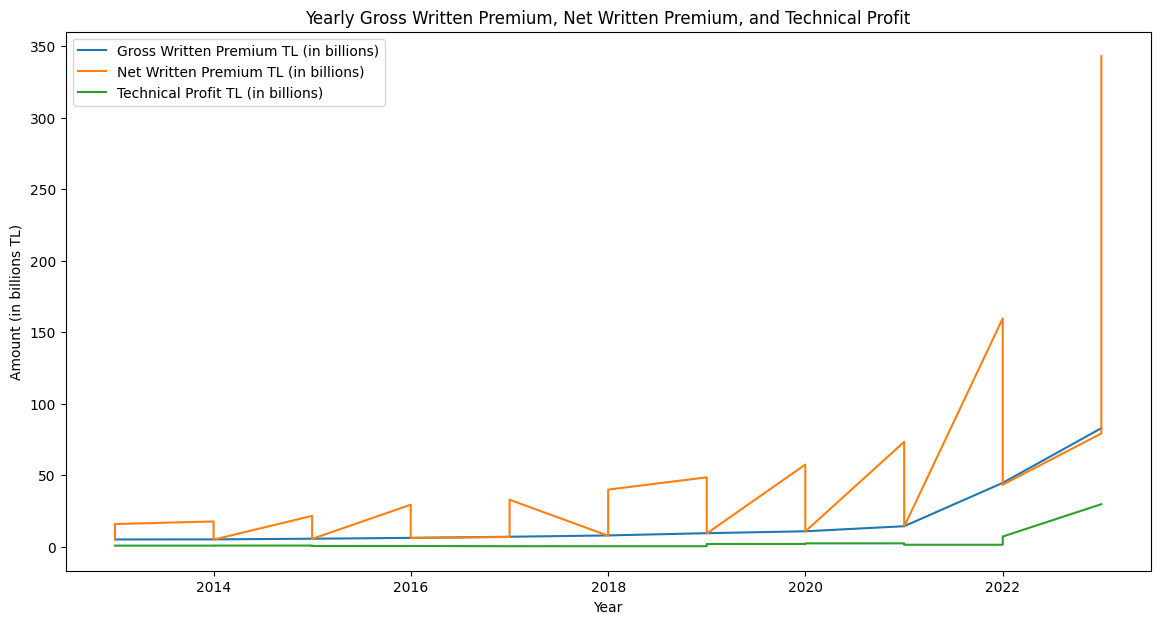

In [6]:
# Plot Initial Data

# Plot the initial data to visualize the Gross Written Premium, Net Written Premium, and Technical Profit over the years.
plt.figure(figsize=(14, 7))

# Plot Gross Written Premium
plt.plot(combined_data.index, combined_data['Gross_Written_Premium_TL'] / 10**9, label='Gross Written Premium TL (in billions)')

# Plot Net Written Premium
plt.plot(combined_data.index, combined_data['Net_Written_Premium_TL'] / 10**9, label='Net Written Premium TL (in billions)')

# Plot Technical Profit
plt.plot(combined_data.index, combined_data['Technical_Profit_TL'] / 10**9, label='Technical Profit TL (in billions)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Amount (in billions TL)')
plt.title('Yearly Gross Written Premium, Net Written Premium, and Technical Profit')

# Add legend
plt.legend()

# Show plot
plt.show()

# Prepare Data for Prophet
Prepare the data for Prophet by resetting the index and renaming columns to 'ds' and 'y'.

In [7]:
# Prepare Data for Prophet

# Reset the index and rename columns to 'ds' and 'y' for Prophet
prophet_data = combined_data.reset_index()[['Period', 'Technical_Profit_TL']]
prophet_data.columns = ['ds', 'y']

# Display the first few rows of the prepared data for Prophet
prophet_data.head()

,ds,y
0,2013-01-01,702040720.0
1,2013-01-01,702040720.0
2,2014-01-01,702040720.0
3,2014-01-01,751010005.0
4,2015-01-01,751010005.0


# Fit Prophet Model
Initialize and fit the Prophet model using the prepared data.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz43h0a1u/u5ofru05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz43h0a1u/nmdfhej9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50403', 'data', 'file=/tmp/tmpz43h0a1u/u5ofru05.json', 'init=/tmp/tmpz43h0a1u/nmdfhej9.json', 'output', 'file=/tmp/tmpz43h0a1u/prophet_modelqc2r4p87/prophet_model-20250124130840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:08:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:

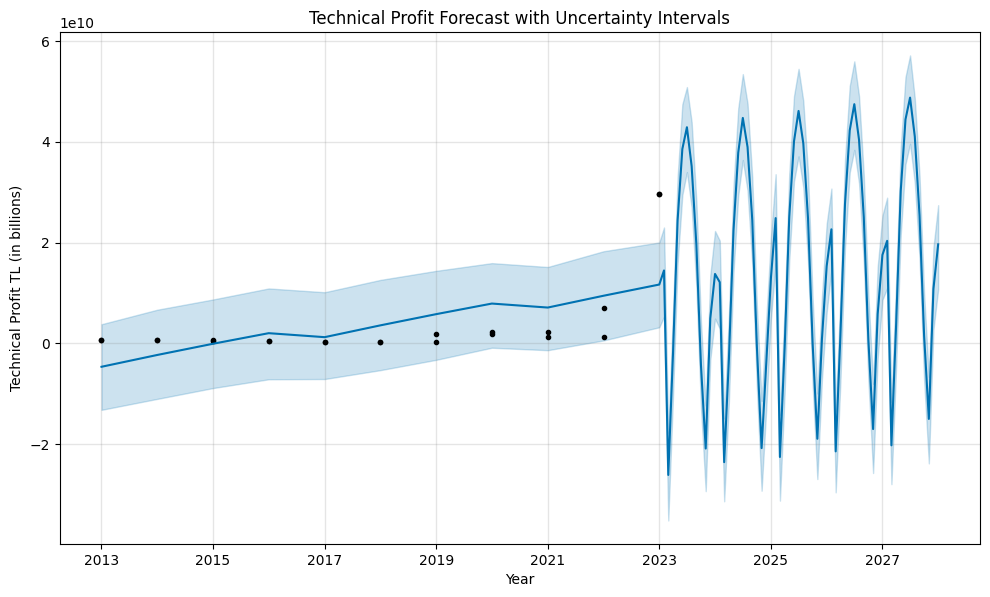

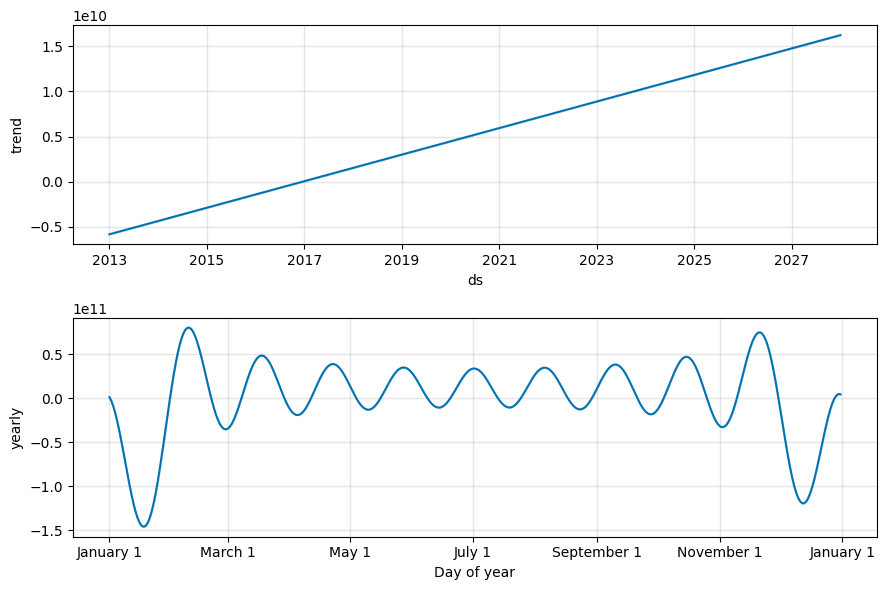

In [8]:
# Fit Prophet Model

# Initialize the Prophet model
model = Prophet()

# Fit the model with the prepared data
model.fit(prophet_data)

# Create a dataframe for future dates (5 years into the future)
future = model.make_future_dataframe(periods=5*12, freq='MS')

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Technical Profit Forecast with Uncertainty Intervals')
plt.xlabel('Year')
plt.ylabel('Technical Profit TL (in billions)')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Forecast Future Data
Create a future DataFrame for 5 years, make predictions using the Prophet model, and plot the forecast results.

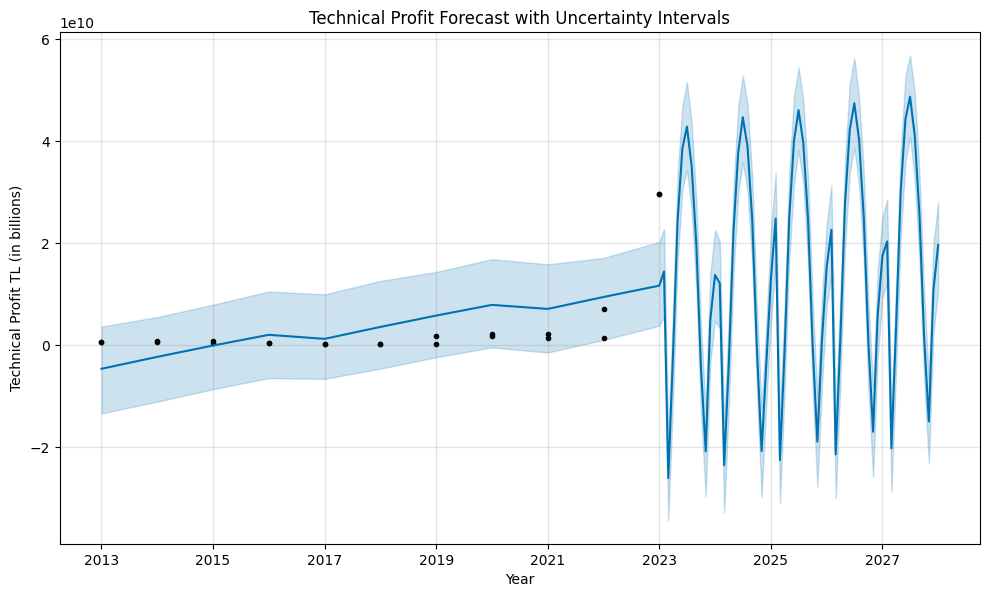

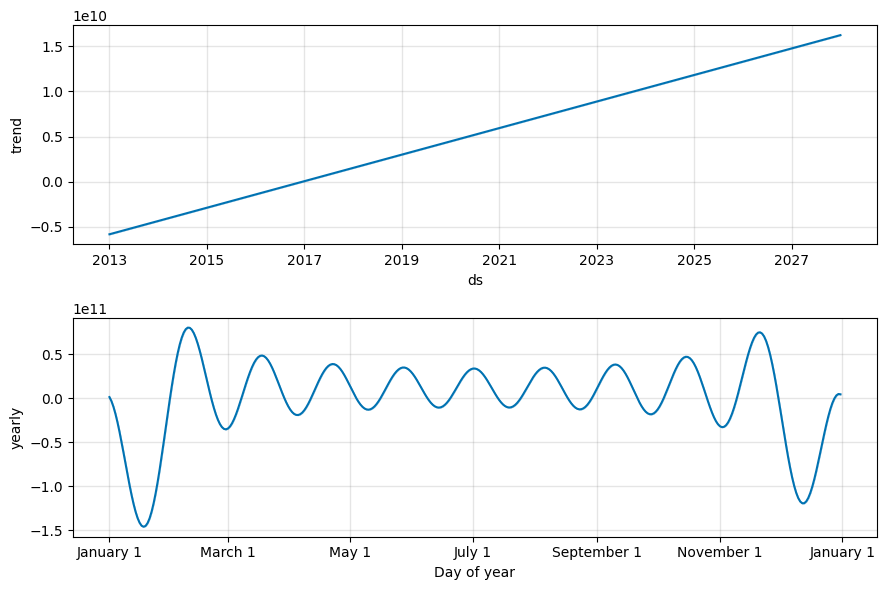

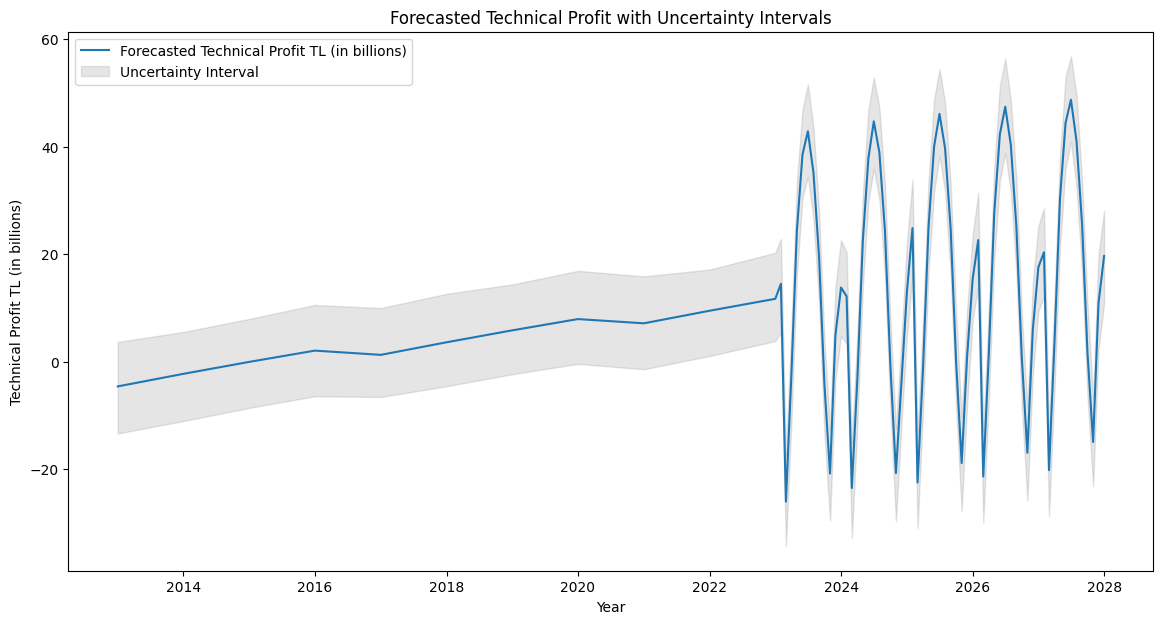

In [9]:
# Forecast Future Data

# Create a future DataFrame for 5 years, make predictions using the Prophet model, and plot the forecast results.

# Create a dataframe for future dates (5 years into the future)
future = model.make_future_dataframe(periods=5*12, freq='MS')

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Technical Profit Forecast with Uncertainty Intervals')
plt.xlabel('Year')
plt.ylabel('Technical Profit TL (in billions)')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Plot the forecasted data in billions
plt.figure(figsize=(14, 7))
plt.plot(forecast['ds'], forecast['yhat'] / 10**9, label='Forecasted Technical Profit TL (in billions)')
plt.fill_between(forecast['ds'], forecast['yhat_lower'] / 10**9, forecast['yhat_upper'] / 10**9, color='gray', alpha=0.2, label='Uncertainty Interval')
plt.xlabel('Year')
plt.ylabel('Technical Profit TL (in billions)')
plt.title('Forecasted Technical Profit with Uncertainty Intervals')
plt.legend()
plt.show()

# Plot Forecast Results
Plot the forecasted Technical Profit with uncertainty intervals and the forecast components.

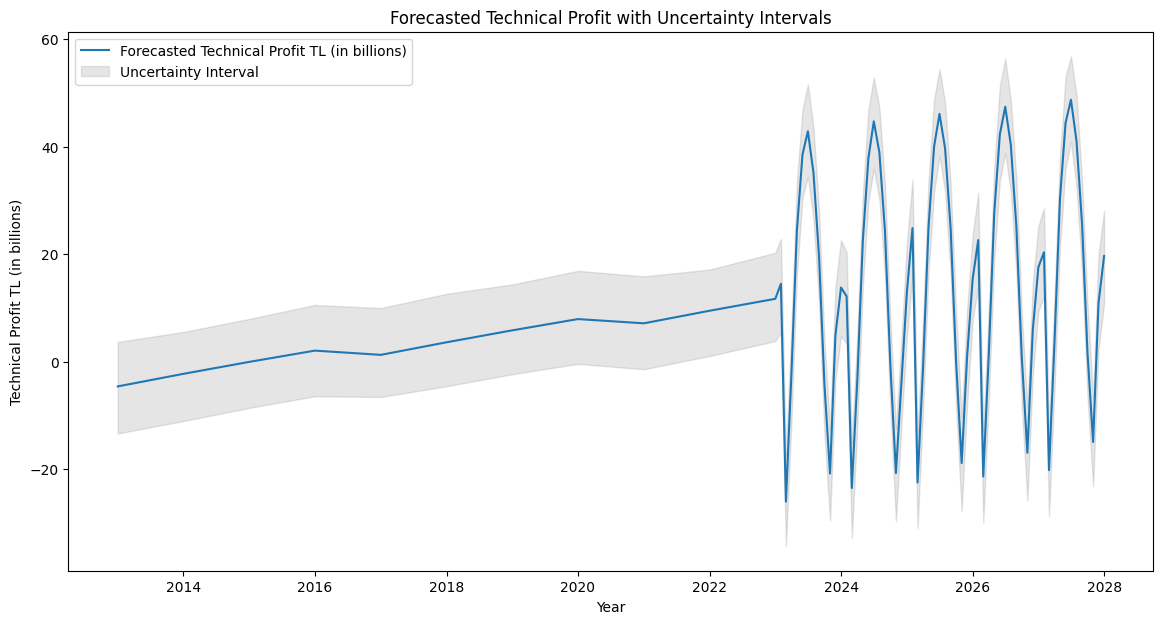

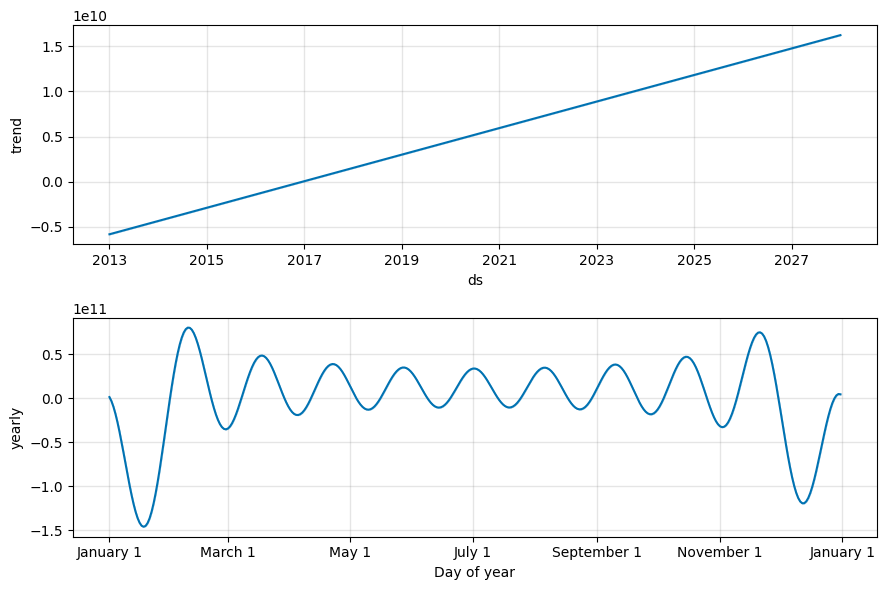

In [10]:
# Plot Forecast Results

# Plot the forecasted data in billions
plt.figure(figsize=(14, 7))
plt.plot(forecast['ds'], forecast['yhat'] / 10**9, label='Forecasted Technical Profit TL (in billions)')
plt.fill_between(forecast['ds'], forecast['yhat_lower'] / 10**9, forecast['yhat_upper'] / 10**9, color='gray', alpha=0.2, label='Uncertainty Interval')
plt.xlabel('Year')
plt.ylabel('Technical Profit TL (in billions)')
plt.title('Forecasted Technical Profit with Uncertainty Intervals')
plt.legend()
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Calculate and Plot Mean Squared Error (MSE)
Calculate the Mean Squared Error (MSE) between the actual and predicted Technical Profit, and plot the actual vs predicted data with the MSE.

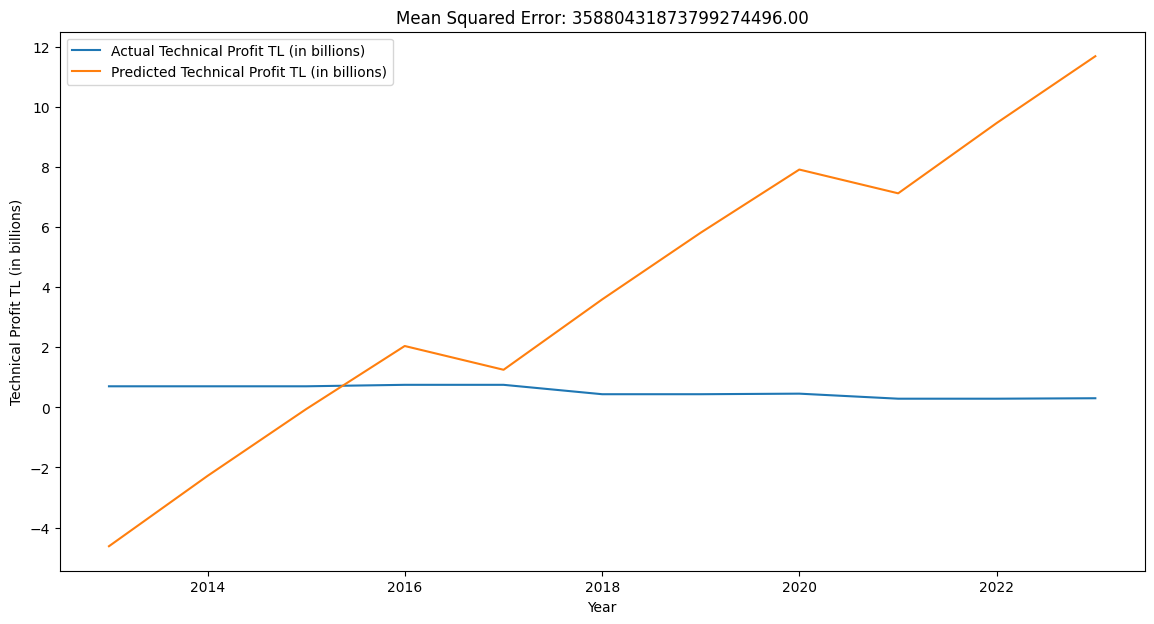

In [11]:
# Calculate and Plot Mean Squared Error (MSE)

# Ensure the actual data and forecast data are aligned
actual = prophet_data.set_index('ds')['y']
predicted = forecast.set_index('ds')['yhat']
common_dates = actual.index.intersection(predicted.index)
actual_common = actual.loc[common_dates]
predicted_common = predicted.loc[common_dates]

# Ensure the lengths are consistent
if len(actual_common) > len(predicted_common):
    actual_common = actual_common.iloc[:len(predicted_common)]
elif len(predicted_common) > len(actual_common):
    predicted_common = predicted_common.iloc[:len(actual_common)]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_common, predicted_common)

# Plot the actual vs predicted data with MSE
plt.figure(figsize=(14, 7))
plt.plot(common_dates, actual_common / 10**9, label='Actual Technical Profit TL (in billions)')
plt.plot(common_dates, predicted_common / 10**9, label='Predicted Technical Profit TL (in billions)')
plt.xlabel('Year')
plt.ylabel('Technical Profit TL (in billions)')
plt.title(f'Mean Squared Error: {mse:.2f}')
plt.legend()
plt.show()